In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
path = os.path.dirname(os.getcwd()) + '\data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


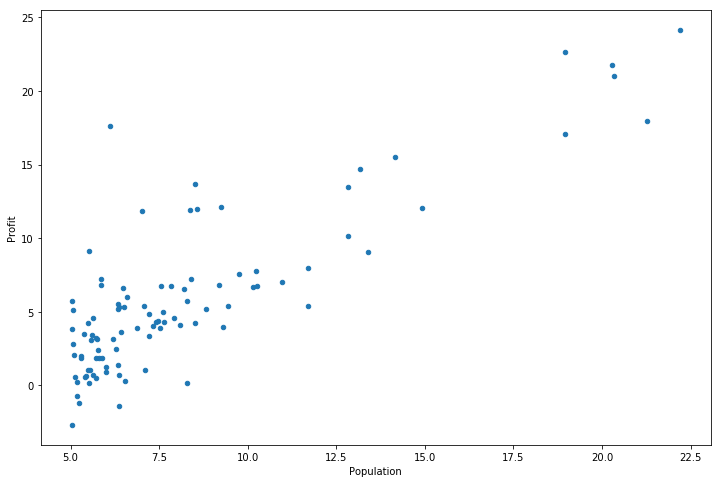

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [5]:
data.insert(0, 'ones', 1)

In [6]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
X = data.iloc[:,:2]

In [8]:
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y = data.iloc[:,-1:]

In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
m = len(X)

In [12]:
m

97

In [13]:
theta = np.zeros((2, 1))
iteration = 1500
alpha = 0.01

In [14]:
theta

array([[ 0.],
       [ 0.]])

In [15]:
X.shape, theta.shape, y.shape

((97, 2), (2, 1), (97, 1))

In [16]:
theta

array([[ 0.],
       [ 0.]])

In [17]:
X = np.mat(X)
y = np.mat(y)

In [18]:
def computeCost(X, y, theta):
    inner = np.power((X * theta - y), 2)
    return np.sum(inner)/(2 * len(X))

In [19]:
(X * theta - y).shape

(97, 1)

In [20]:
computeCost(X, y, theta)

32.072733877455676

In [21]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X * theta - y
        
        for j in range(len(theta)):
            temp = np.multiply(error, X[:,j])
            theta[j,0] = theta[j,0] - (alpha / m) * np.sum(temp)
            
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [22]:
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iteration)  
g

array([[-3.63029144],
       [ 1.16636235]])

In [23]:
computeCost(X, y, g)

4.4833882565877259

([<matplotlib.axis.YTick at 0x19dae9b2390>,
 <a list of 8 Text yticklabel objects>)

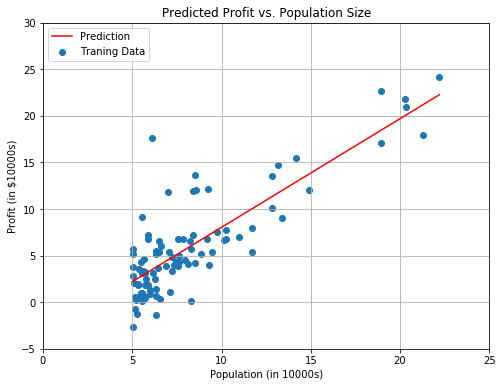

In [24]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[1, 0] * x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population (in 10000s)')  
ax.set_ylabel('Profit (in $10000s)')  
ax.set_title('Predicted Profit vs. Population Size')  
ax.grid()
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(-5, 35, 5))

([<matplotlib.axis.YTick at 0x19daea4d978>,
 <a list of 6 Text yticklabel objects>)

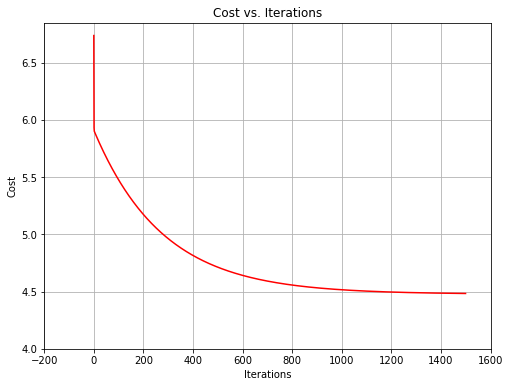

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(np.arange(iteration), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Iterations')
ax.grid()

plt.xticks(np.arange(-200, 1800, 200))
plt.yticks(np.arange(4, 7, 0.5))